In [1]:
# Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
style.use("ggplot")
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Target the News Accounts
target = ("@OhioGOP","@OHDems")

# Variables for DataFrame
media_sources = []
text = []
date = []
tweets_ago = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Tweet Counter
counter = 1

# Loop through each user
for user in target:
    
    # Tweet counter per target
    tweet_count = 0

    # Loop through 2 pages of tweets (total 40 tweets)
    for x in range(1,6):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page = x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Add to target Tweet count
            tweet_count += 1
            
            # Print Tweets
            print(f"Tweet {counter}: {tweet['text']}")
            
            # Run Vader Analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results ["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            
             # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            media_sources.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)      
            
            
            # Add to counter
            counter += 1

Tweet 1: RT @JimRenacci: Thanks to @Varneyco's Stuart Varney for having me on the show this morning. We discussed my meeting at the White House with…
Tweet 2: RT @GOP: .@kayleighmcenany: He sanctioned more than 100+ Russian targets. He closed two diplomatic annexes in the consulate. He enforced Ma…
Tweet 3: RT @WhiteHouse: President Trump: “I don’t see any reason why it wouldn’t be Russia… We are doing everything in our power to prevent Russian…
Tweet 4: RT @JonHusted: A committee of Congressional House Democrats issued a report on election security listing the top 18 most vulnerable states.…
Tweet 5: RT @JayHottinger: Don’t forget to vote in the Special Election in 12th Congressional District on or before August 7th @Troy_Balderson https…
Tweet 6: Hey @dannyoconnor1, why are you misleading voters about your work experience? 

"Public records reveal that O’Conno… https://t.co/BtHdkVaYlM
Tweet 7: Ohio is suing deceptive drug companies that fueled the opioid epidemic, but Democrat Attorn

Tweet 61: RT @PelandaforOhio: It was a pleasure to join my friend and colleague @BurkeForOhio this morning at the @ohiogop to discuss @DeWineHustedOH…
Tweet 62: Where does @RichCordray stand on Medicare for all? Ohioans deserve to know! #OHGov https://t.co/b7zO32owkM
Tweet 63: RT @WarrenDavidson: #winning in Ohio. While @GOP has done great things to make Americans #betteroffnow, Ohio has made great progress with p…
Tweet 64: RT @JonHusted: Best States to do business? Ohio #15 overall according to CNBC. Let’s keep the momentum going and set our sights on the top…
Tweet 65: RT @JimRenacci: If Brown ignores Kavanaugh’s highly regarded record &amp; tries to block @POTUS's #SCOTUS nominee, it's 1 more signal Brown car…
Tweet 66: RT @JonHusted: When Democrats like Ted Strickland &amp; @RichCordray were in charge of Ohio, they drained our savings account to just 89 cents.…
Tweet 67: RT @JimRenacci: .@axios + @SurveyMonkey released a new public poll that shows the OH Senate race in a statistic

Tweet 141: We agree https://t.co/aYMKPXU7Ao
Tweet 142: RT @DavidPepper: A cartoon's worth a thousand words. 

In this case, even more. 

@DispatchAlerts calls out DeWine for being entirely untru…
Tweet 143: RT @JacobNPetersOH: So despite @Troy_Balderson getting fundraisers with @VP, @SpeakerRyan (twice), and the entire OH GOP delegation, he was…
Tweet 144: RT @RandyLudlow: Ohio special US House election: Faith, family drive Democrat @dannyoconnor1's approach to public office. #OH12 https://t.c…
Tweet 145: RT @CaseyforOhio: I really enjoyed sharing my thoughts and experiences on the #OHDEMS Podcast! I am looking forward to fighting shoulder to…
Tweet 146: RT @ChrisEClevenger: Two of my favorite candidates running for the #OHLEG this year! Check out @Lauren4Ohio and @CaseyforOhio today! #OHPOL…
Tweet 147: RT @TRumbalski: Are public education, economic opportunity, healthcare, and having a representative willing to work across the aisle to get…
Tweet 148: @HarlemFlipper @Lauren4Ohio @Case

In [3]:
# Convert sentiments to a DataFrame
df = pd.DataFrame({ "Media":media_sources,
                           "Tweet":text,
                            "Date":date,
                            "Compound Score":compound_list,
                            "Positive Score": positive_list,
                            "Neutral Score": neutral_list,
                            "Negative Score":negative_list,
                            "Tweets Ago": tweets_ago})

In [4]:
# Rearrange columns of DataFrame 
df = df[["Media","Date","Tweet","Compound Score","Positive Score","Negative Score","Neutral Score", "Tweets Ago"]]

df.head()

,Media,Date,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@OhioGOP,Tue Jul 17 19:59:03 +0000 2018,RT @JimRenacci: Thanks to @Varneyco's Stuart V...,0.4404,0.112,0.000,0.888,1
1,@OhioGOP,Tue Jul 17 19:19:28 +0000 2018,RT @GOP: .@kayleighmcenany: He sanctioned more...,0.0000,0.000,0.000,1.000,2
2,@OhioGOP,Tue Jul 17 19:17:29 +0000 2018,RT @WhiteHouse: President Trump: “I don’t see ...,0.0258,0.046,0.000,0.954,3
3,@OhioGOP,Tue Jul 17 18:59:05 +0000 2018,RT @JonHusted: A committee of Congressional Ho...,0.2516,0.188,0.098,0.715,4
4,@OhioGOP,Tue Jul 17 18:56:16 +0000 2018,RT @JayHottinger: Don’t forget to vote in the ...,0.2023,0.114,0.081,0.805,5


In [5]:
# Subset DataFrame by each Media Source 
Dem = df.loc[df["Media"] == "@OHDems"]
Rep = df.loc[df["Media"] == "@OhioGOP"]


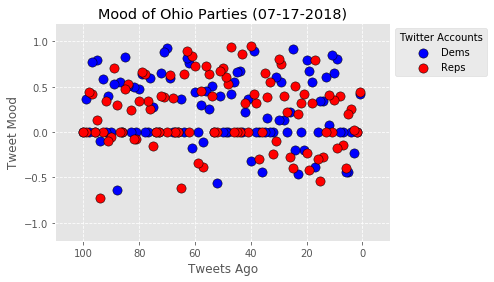

In [6]:
# Create scatter plots
plt.scatter(Dem['Tweets Ago'], Dem['Compound Score'], c='blue',edgecolor='black', s=85, alpha=1, label='Dems')
plt.scatter(Rep['Tweets Ago'], Rep['Compound Score'], c='red',edgecolor='black', s=85, alpha=1, label='Reps')



# Incorporate other Plot features
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.title(f"Mood of Ohio Parties ({now})") 
plt.xlabel("Tweets Ago")
plt.xlim(110,-10)
plt.ylabel("Tweet Mood")
plt.ylim(-1.2,1.2)
plt.legend(bbox_to_anchor=(1, 1), title='Twitter Accounts')
plt.grid(True, ls='dashed')



plt.show()